# Итоговый проект. Предсказание оценки ученика в году

## Описание данных

Данные для решения проектной задачи представляются в виде [таблицы](https://edu.sirius.online/noo-back/content/_image/08d8e3476772c48eb205f7979a9c93c887bc481e)<sup>1</sup>.

В Португалии учебный год разбит на три периода обучения поменьше, и в конце каждого из них ученики получают оценку по предмету. Итоговой оценкой по предмету в году считается оценка, полученная в конце третьего периода обучения. Для каждого ученика её значение находится в колонке G3. Именно эту характеристику необходимо научиться предсказывать.

Подробное описание остальных факторов приведено ниже. В скобках указан тип и возможные значения каждого фактора.

*   `school` — школа, в которой учится ученик (бинарный: `GP` — Gabriel Pereira или `MS` — Mousinho da Silveira).
*   `gender` — пол ученика (бинарный: `F` — женский или `M` — мужской).
*   `age` — возраст ученика (численный: от 15 до 22).
*   `address` — тип местности, в которой живёт ученик (бинарный: `U` — город или `R` — пригород).
*   `famsize` — размер семьи (бинарный: `LE3` — «не больше 3 человек» или `GT3` — «больше 3 человек»).
*   `Pstatus` — семейный статус родителей (бинарный: `T` — «живут вместе» или `A` — «живут раздельно»).
*   `Medu` — образование матери (численный: `0` — «нет образования», `1` — «начальная школа» (4 класса), `2` — «от 5 до 9 классов», `3` — «среднее образование» или `4` — «высшее образование»).
*   `Fedu` — образование отца (численный: `0` — «нет образования», `1` — «начальная школа» (4 класса), `2` — «от 5 до 9 классов», `3` — «среднее образование» или `4` — «высшее образование»).
*   `Mjob` — работа матери (категориальный: `teacher` — «учитель», `health` — «работа в здравоохранении», `services` — «гражданская служба», `at_home` — «домохозяйка» или `другое` — «другое»).
*   `Fjob` — работа отца (категориальный: `teacher` — «учитель», `health` — «работа в здравоохранении», `services` — «гражданская служба», `at_home` — «домохозяин» или `другое` — «другое»).
*   `guardian` — попечитель ученика (категориальный: `mother` — «мать», `father` — «отец» или `other` — «кто-то другой»).
*   `traveltime` — время в пути от дома до школы (численный: `1` — «меньше 15 минут», `2` — «от 15 до 30 минут», `3` — «от 30 минут до 1 часа» или `4` — «больше 1 часа»).
*   `studytime` — время на учёбу в неделю (численный: `1` — «меньше 2 часов», `2` — «от 2 до 5 часов», `3` — «от 5 до 10 часов» или `4` — «больше 10 часов»).
*   `failures` — число незачётов по предмету в прошлом (численный: от 0 до 3).
*   `schoolsup` — дополнительная образовательная поддержка (бинарный: `yes` — да или `no` — нет).
*   `famsup` — дополнительная семейная поддержка (бинарный: `yes` — да или `no` — нет).
*   `paid` — дополнительные занятия по предмету (бинарный: `yes` — да или `no` — нет).
*   `activities` — внеучебная деятельность (бинарный: `yes` — да или `no` — нет).
*   `nursery` — ходил в подготовительную школу (бинарный: `yes` — да или `no` — нет).
*   `higher` — планирует получать высшее образование (бинарный: `yes` — да или `no` — нет).
*   `internet` — есть доступ к интернету дома (бинарный: `yes` — да или `no` — нет).
*   `romantic` — есть вторая половинка (бинарный: `yes` — да или `no` — нет).
*   `famrel` — отношения в семье (численный: от 1 — «очень плохие» до 5 — «очень хорошие»).
*   `freetime` — свободное время после школы (численный: от 1 — «очень мало» до 5 — «очень много»).
*   `goout` — время с друзьями (численный: от 1 — «очень мало» до 5 — «очень много»).
*   `health` — состояние здоровья (численный: от 1 — «очень плохое» до 5 — «очень хорошее»).
*   `absences` — число пропусков занятий (численный: от 0 до 93).
*   `G1` — оценка за первый учебный период (численный: от 0 до 20).

### Предсказываемая характеристика:

*   `G3` — итоговая оценка (численный: от 0 до 20).

---
<sup>1</sup>. P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5–12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

# Исследовательский анализ данных

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
sns.set(rc={"figure.figsize": (11.7, 8.27)})

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv("student-mat.csv", sep=",")

<Axes: xlabel='G3', ylabel='Count'>

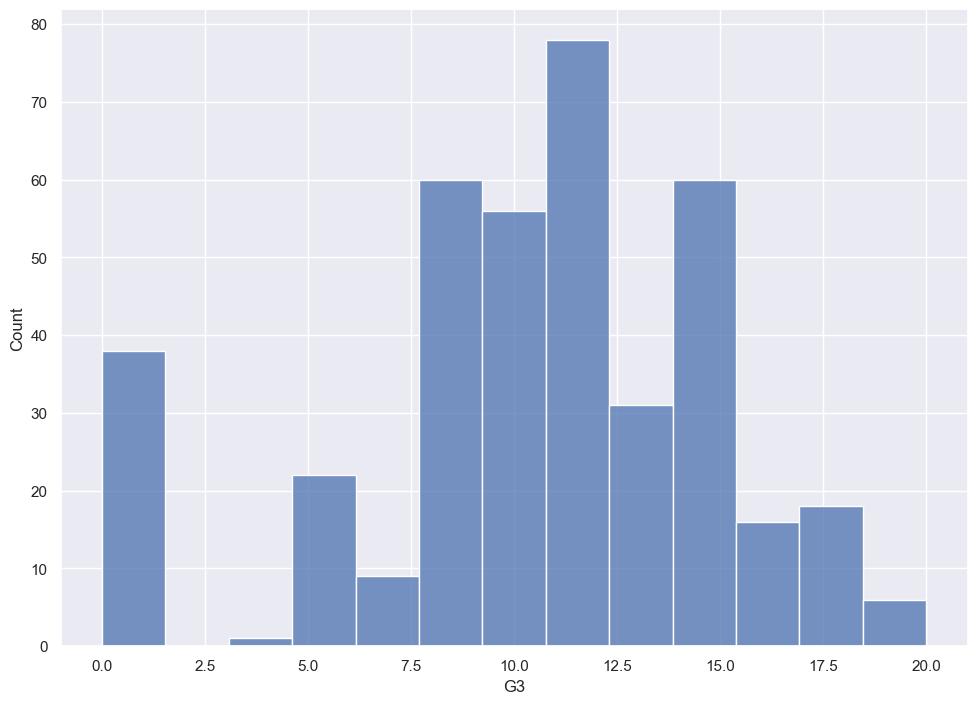

In [5]:
sns.histplot(data["G3"])

<Axes: xlabel='G1', ylabel='Count'>

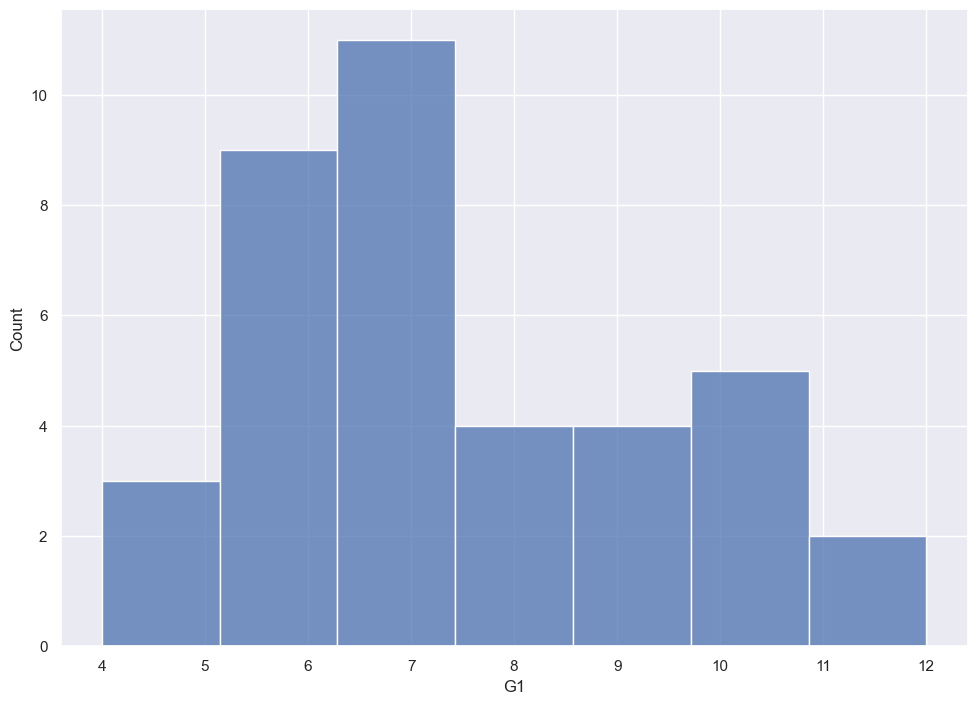

In [7]:
sns.histplot(data[data["G3"] == 0]["G1"])

In [8]:
data = data[data["G3"] != 0]

<Axes: xlabel='G3', ylabel='Count'>

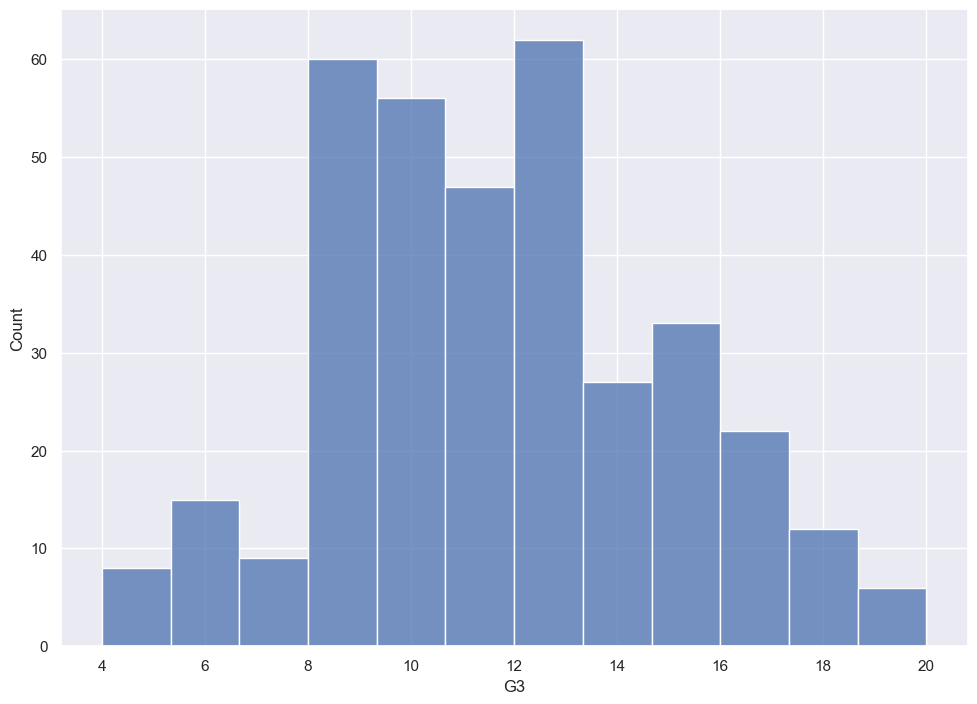

In [9]:
sns.histplot(data["G3"])

In [10]:
X = data.drop(columns=["G3"])
y = data["G3"]

**Разделение данных на обучающую и тестовую выборки**

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=0)

In [13]:
len(X_train)

307

In [14]:
len(X_test)

50

In [15]:
X_y_train = X_train.copy(deep=True)

In [16]:
X_y_train['y'] = y_train

In [17]:
X_y_train.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,y
age,1.000000,-0.143667,-0.152028,0.124947,-0.012044,0.265867,0.105719,0.018381,0.127471,-0.066960,0.232719,-0.058061,-0.163554
Medu,-0.143667,1.000000,0.622469,-0.189125,0.059405,-0.217911,-0.005481,-0.021037,0.080858,-0.030022,0.052977,0.180870,0.205427
Fedu,-0.152028,0.622469,1.000000,-0.194381,-0.031392,-0.265805,-0.031753,-0.054498,0.029325,-0.007715,-0.015996,0.160996,0.150231
traveltime,0.124947,-0.189125,-0.194381,1.000000,-0.105084,0.131414,-0.002823,-0.007708,0.062239,0.016959,0.028547,-0.119743,-0.131757
studytime,-0.012044,0.059405,-0.031392,-0.105084,1.000000,-0.136720,0.063829,-0.132218,-0.018720,-0.087165,-0.098216,0.156326,0.158553
failures,0.265867,-0.217911,-0.265805,0.131414,-0.136720,1.000000,-0.020901,0.133293,0.195804,0.042964,0.161519,-0.326272,-0.311091
famrel,0.105719,-0.005481,-0.031753,-0.002823,0.063829,-0.020901,1.000000,0.183048,0.068130,0.140506,-0.073748,0.052678,0.075401
freetime,0.018381,-0.021037,-0.054498,-0.007708,-0.132218,0.133293,0.183048,1.000000,0.255339,0.086641,-0.074686,-0.023542,-0.051553
goout,0.127471,0.080858,0.029325,0.062239,-0.018720,0.195804,0.068130,0.255339,1.000000,-0.061314,0.057467,-0.170340,-0.196119
health,-0.066960,-0.030022,-0.007715,0.016959,-0.087165,0.042964,0.140506,0.086641,-0.061314,1.000000,-0.057903,-0.074392,-0.071237


In [18]:
corr = X_y_train.corr()['y']

In [19]:
corr

age          -0.163554
Medu          0.205427
Fedu          0.150231
traveltime   -0.131757
studytime     0.158553
failures     -0.311091
famrel        0.075401
freetime     -0.051553
goout        -0.196119
health       -0.071237
absences     -0.229859
G1            0.896589
y             1.000000
Name: y, dtype: float64

In [20]:
corr = corr[(corr >= 0.1) | (corr <= -0.1)]

In [21]:
corr

age          -0.163554
Medu          0.205427
Fedu          0.150231
traveltime   -0.131757
studytime     0.158553
failures     -0.311091
goout        -0.196119
absences     -0.229859
G1            0.896589
y             1.000000
Name: y, dtype: float64

<Axes: xlabel='G1', ylabel='y'>

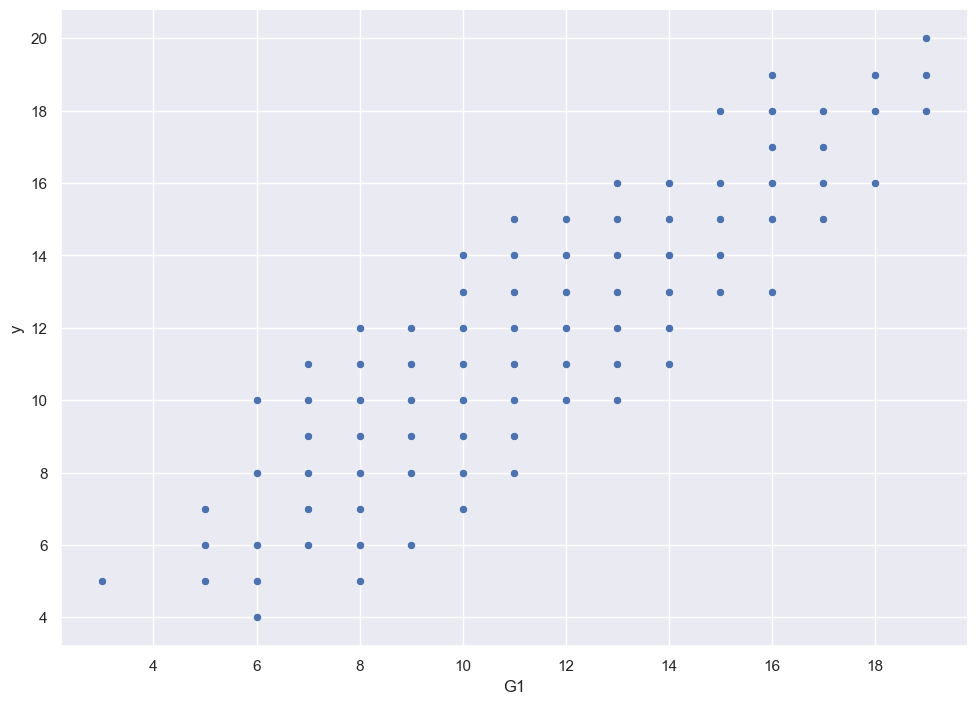

In [22]:
sns.scatterplot(x=X_y_train['G1'], y=X_y_train['y'])

<Axes: xlabel='age', ylabel='y'>

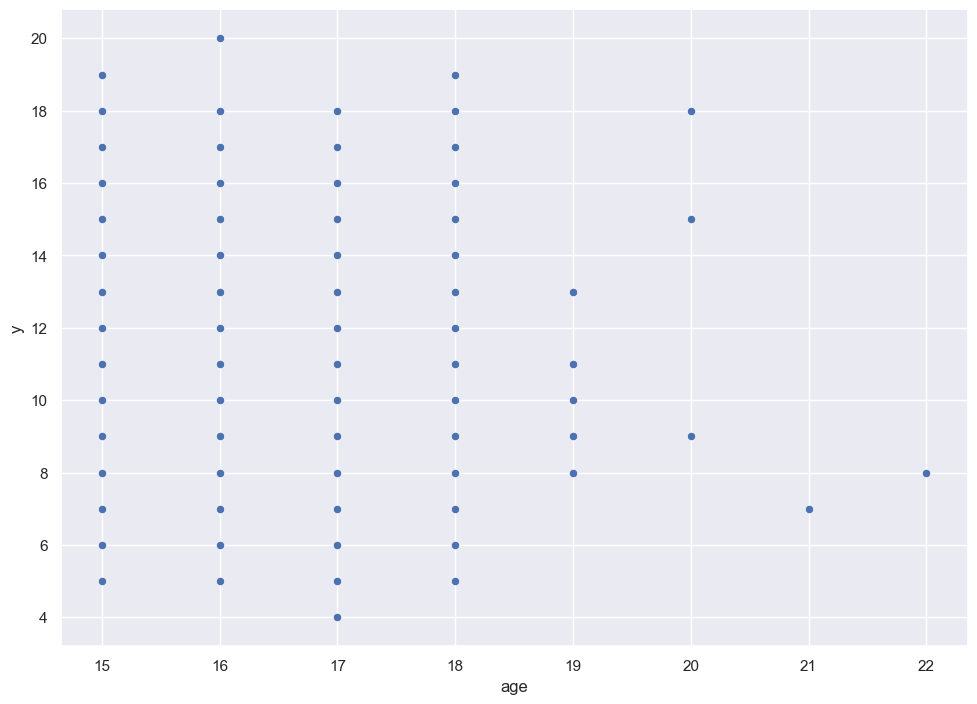

In [23]:
sns.scatterplot(x=X_y_train['age'], y=X_y_train['y'])

<Axes: xlabel='absences', ylabel='y'>

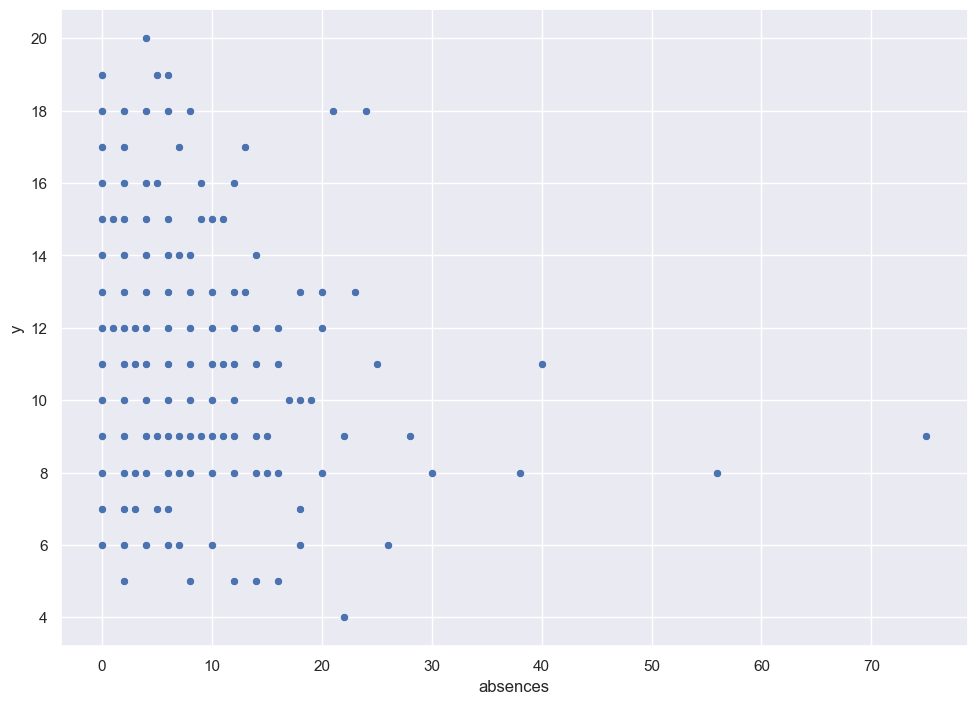

In [24]:
sns.scatterplot(x=X_y_train['absences'], y=X_y_train['y'])

In [25]:
numeric_factors_to_use = ['G1', 'age', "Medu", "Fedu", "failures", "studytime", 'traveltime']

In [26]:
X_y_train \
    .groupby('higher', as_index=False) \
    .agg({'y': 'mean'})

,higher,y
0,no,9.833333
1,yes,11.657627


In [27]:
categorical_columns = X_y_train.select_dtypes(include=['object', 'category']).columns.tolist() 

In [28]:
interesting_categorial_factors = ["Mjob", 'Fjob', "schoolsup", "higher"]

# Препроцессинг. Целевое кодирование

In [29]:
from category_encoders.target_encoder import TargetEncoder

In [30]:
mjob_target_encoder = TargetEncoder()
mjob_target_encoder.fit(X_y_train["Mjob"], X_y_train['y'])

,verbose,0
,cols,['Mjob']
,drop_invariant,False
,return_df,True
,handle_missing,'value'
,handle_unknown,'value'
,min_samples_leaf,20
,smoothing,10
,hierarchy,None


In [31]:
X_y_train["Mjob"]

295      health
224     teacher
197     teacher
231       other
7         other
         ...   
357    services
210       other
117       other
47       health
190    services
Name: Mjob, Length: 307, dtype: object

In [32]:
mjob_target_encoder = TargetEncoder()
mjob_target_encoder.fit(X_y_train["Mjob"], X_y_train['y'])

fjob_target_encoder = TargetEncoder()
fjob_target_encoder.fit(X_y_train["Fjob"], X_y_train['y'])

schoolsup_target_encoder = TargetEncoder()
schoolsup_target_encoder.fit(X_y_train["schoolsup"], X_y_train['y'])

higher_target_encoder = TargetEncoder()
higher_target_encoder.fit(X_y_train["higher"], X_y_train['y'])

,verbose,0
,cols,['higher']
,drop_invariant,False
,return_df,True
,handle_missing,'value'
,handle_unknown,'value'
,min_samples_leaf,20
,smoothing,10
,hierarchy,None


In [33]:
X_y_train["Mjob_encoded"] = mjob_target_encoder.transform(X_y_train["Mjob"])
X_y_train["Fjob_encoded"] = fjob_target_encoder.transform(X_y_train["Fjob"])
X_y_train["schoolsup_encoded"] = schoolsup_target_encoder.transform(X_y_train["schoolsup"])
X_y_train["higher_encoded"] = higher_target_encoder.transform(X_y_train["higher"])

In [34]:
X_y_train

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,health,absences,G1,y,Mjob_encoded,Fjob_encoded,schoolsup_encoded,higher_encoded
295,GP,M,17,U,GT3,T,3,3,health,other,...,4,3,5,4,14,11,12.781907,11.339181,11.835821,11.657627
224,GP,F,16,U,GT3,T,4,4,teacher,services,...,3,2,5,0,13,14,11.734708,11.476373,11.835821,11.657627
197,GP,M,16,R,LE3,T,3,3,teacher,other,...,3,4,3,8,9,10,11.734708,11.339181,11.835821,11.657627
231,GP,M,17,R,GT3,T,2,2,other,other,...,5,2,1,4,11,11,10.963057,11.339181,11.835821,11.657627
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,6,6,6,10.963057,12.723082,10.094869,11.657627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,MS,F,17,U,LE3,A,3,2,services,other,...,2,3,5,2,12,11,12.251790,11.339181,11.835821,11.657627
210,GP,F,19,U,GT3,T,3,3,other,other,...,3,3,3,10,8,8,10.963057,11.339181,11.835821,11.657627
117,GP,M,16,U,GT3,T,3,3,other,services,...,4,2,5,0,13,13,10.963057,11.476373,11.835821,11.657627
47,GP,M,16,U,GT3,T,4,3,health,services,...,2,2,2,4,19,20,12.781907,11.476373,11.835821,11.657627


In [35]:
factors_to_use = numeric_factors_to_use + ["Mjob_encoded", "Fjob_encoded", "schoolsup_encoded", "higher_encoded"]

In [36]:
X_train_encoded = X_y_train.copy(deep=True)

In [37]:
X_train_encoded = X_train_encoded[factors_to_use]

In [38]:
X_train_encoded

,G1,age,Medu,Fedu,failures,studytime,traveltime,Mjob_encoded,Fjob_encoded,schoolsup_encoded,higher_encoded
295,14,17,3,3,0,1,1,12.781907,11.339181,11.835821,11.657627
224,13,16,4,4,0,3,1,11.734708,11.476373,11.835821,11.657627
197,9,16,3,3,0,1,3,11.734708,11.339181,11.835821,11.657627
231,11,17,2,2,0,2,2,10.963057,11.339181,11.835821,11.657627
7,6,17,4,4,0,2,2,10.963057,12.723082,10.094869,11.657627
...,...,...,...,...,...,...,...,...,...,...,...
357,12,17,3,2,0,2,2,12.251790,11.339181,11.835821,11.657627
210,8,19,3,3,0,4,1,10.963057,11.339181,11.835821,11.657627
117,13,16,3,3,0,1,2,10.963057,11.476373,11.835821,11.657627
47,19,16,4,3,0,4,1,12.781907,11.476373,11.835821,11.657627


# Нормализация (масштабирование) факторов к диапозону [0, 1]

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()
scaler.fit(X_train_encoded)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [41]:
X_train_scaled = scaler.transform(X_train_encoded)

In [42]:
X_train_scaled # numpy матрица

array([[0.6875    , 0.28571429, 0.75      , ..., 0.        , 1.        ,
        1.        ],
       [0.625     , 0.14285714, 1.        , ..., 0.09913411, 1.        ,
        1.        ],
       [0.375     , 0.14285714, 0.75      , ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.625     , 0.14285714, 0.75      , ..., 0.09913411, 1.        ,
        1.        ],
       [1.        , 0.14285714, 1.        , ..., 0.09913411, 1.        ,
        1.        ],
       [0.5       , 0.14285714, 0.5       , ..., 0.09913411, 1.        ,
        1.        ]])

In [43]:
X_train_scaled[:, 0] # Обращение к первой колонке

array([0.6875, 0.625 , 0.375 , 0.5   , 0.1875, 0.4375, 0.6875, 0.1875,
       0.75  , 0.    , 0.75  , 0.8125, 0.375 , 0.6875, 0.5   , 0.75  ,
       0.4375, 0.8125, 0.4375, 0.3125, 0.4375, 0.5   , 0.5   , 0.5   ,
       0.1875, 0.5   , 0.5625, 0.5   , 0.5   , 0.25  , 0.625 , 0.75  ,
       0.6875, 0.375 , 0.5625, 0.4375, 0.75  , 0.625 , 0.3125, 0.375 ,
       0.8125, 0.625 , 0.9375, 0.6875, 0.8125, 0.6875, 0.375 , 0.5   ,
       0.3125, 0.3125, 0.4375, 0.5625, 0.1875, 0.1875, 0.25  , 0.4375,
       0.25  , 0.5   , 0.3125, 0.3125, 0.5   , 0.875 , 0.6875, 0.5   ,
       0.125 , 0.375 , 0.8125, 0.4375, 0.875 , 0.5625, 0.75  , 0.5   ,
       0.1875, 0.625 , 0.375 , 0.5625, 0.75  , 0.3125, 0.6875, 0.5625,
       0.3125, 0.3125, 0.25  , 0.75  , 0.625 , 0.4375, 0.375 , 0.375 ,
       0.4375, 0.5   , 0.6875, 0.3125, 0.5625, 0.4375, 1.    , 0.3125,
       0.5625, 0.4375, 0.375 , 0.3125, 0.375 , 0.4375, 0.75  , 0.3125,
       0.3125, 0.25  , 0.3125, 0.6875, 0.3125, 0.75  , 0.25  , 0.3125,
      

# Создание модели линейной регрессии

In [65]:
y_train

295    11
224    14
197    10
231    11
7       6
       ..
357    11
210     8
117    13
47     20
190    13
Name: G3, Length: 307, dtype: int64

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model = LinearRegression()

# Обучение модели

In [46]:
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
model.score(X_train_scaled, y_train)

0.8206863785263498

Кодируем тестовую выборку **теми же кодировщиками**, что и при обучающей выборке

In [48]:
X_test["Mjob_encoded"] = mjob_target_encoder.transform(X_test["Mjob"])
X_test["Fjob_encoded"] = fjob_target_encoder.transform(X_test["Fjob"])
X_test["schoolsup_encoded"] = schoolsup_target_encoder.transform(X_test["schoolsup"])
X_test["higher_encoded"] = higher_target_encoder.transform(X_test["higher"])

Нормализация (масштабирование) факторов к диапозону [0, 1]. Используем тот же объект **scaler**, что и при обучающей выборке

In [49]:
X_test_encoded = X_test[factors_to_use]

In [50]:
X_test_scaled = scaler.transform(X_test_encoded)

Проверка точности на тестовой выборке

In [51]:
model.score(X_test_scaled, y_test) # оценка точности модели по метрике R^2 на обучающей выборке

0.7278059083711639

In [52]:
def score_model(model, X_test, y_test):
    y_preds = model.predict(X_test)
    
    errs = []
    
    for y, y_pred in zip(y_test, y_preds):
        errs.append(abs(y-y_pred))
    mae = sum(errs) / len(errs)
    mean_y_test = sum(y_test) / len(y_test)
    r2 = 1 - sum(err ** 2 for err in errs) / sum((y - mean_y_test) ** 2 for y in y_test)
    return mae, r2

In [53]:
score_model(model, X_test_scaled, y_test)

(1.289932200783224, 0.7278059083711639)

In [54]:
model.predict(X_test_scaled) # предсказание модели численной характеристики G3

array([12.28973536, 11.16057207,  9.22847546, 12.4171255 ,  7.96640494,
        7.58879649, 10.43342026, 10.87751139, 14.94288024, 15.30810275,
       12.50292408, 12.62678505, 14.26557074, 14.11290565,  9.08506111,
       11.07263249, 13.92266825, 14.04234316, 15.97583319, 12.24577748,
        6.69736088, 15.73123848,  8.9811407 , 10.87325769,  7.8918567 ,
       12.94246639, 12.40655858,  8.62095996, 14.31107984,  7.88097415,
        7.67250753,  7.8969954 , 12.17297401,  8.88633288, 10.73263861,
       14.10612511, 12.05292006,  7.93129161, 11.66573143, 18.12350829,
       13.70410088, 12.85960961, 15.16757594,  9.28737376,  7.00744211,
       13.65554177,  8.18414173,  9.23857638, 11.22469894, 13.39906456])

# Построение **доверительного интервала** для реального понимания точности модели машинного обучения. Bootstrap выборка
Это нужно для того, чтобы оценить точность модели с точки зрения **глобальной** задачи, а не определённого подмножества всех существующих данных для этой задачи.

In [55]:
maes = []
r2s = []
X_y_test = X_test_encoded.copy(deep=True)
X_y_test["y"] = y_test

for i in range(10000):
    X_y_sample = X_y_test.sample(len(X_y_test), replace=True)

    X_test_sample = X_y_sample.drop(columns=["y"])
    X_test_sample = scaler.transform(X_test_sample) # scaler обучен на обучающей выборке
    y_test_sample = X_y_sample['y']

    mae_sample, r2_sample = score_model(model, X_test_sample, y_test_sample)

    maes.append(mae_sample)
    r2s.append(r2_sample)

In [56]:
maes = list(sorted(maes))
maes

[0.8643432983227671,
 0.894013358415026,
 0.8949070250734065,
 0.9043346008802442,
 0.9166197542541581,
 0.9187121205173644,
 0.9221779437530009,
 0.923855993723684,
 0.9288321914942576,
 0.9320290571340584,
 0.9321171018090237,
 0.9334395293622019,
 0.9398413965451691,
 0.9419740815534096,
 0.9453745844815752,
 0.9455503974780599,
 0.9456865840053277,
 0.9468248423174433,
 0.9479464099176107,
 0.9501231825448493,
 0.9514934965113383,
 0.951705513149272,
 0.9517273123684765,
 0.9524551437630874,
 0.9547989819975914,
 0.954942085900173,
 0.9558351593745432,
 0.9574061047100014,
 0.9582357841129862,
 0.9595911544616165,
 0.9596051406410914,
 0.9613555824547108,
 0.9614648548814871,
 0.9618267430093417,
 0.9624809286312521,
 0.9635712369606925,
 0.9641318791132621,
 0.9651119759034379,
 0.9666501874349072,
 0.9687156529025942,
 0.9690814450518168,
 0.9693329249645108,
 0.9697907980918424,
 0.9702100932912885,
 0.9723009642577586,
 0.9726081083002315,
 0.9726752924580516,
 0.97283982527590

In [57]:
maes_reduce = maes[int(len(maes)*0.025):int(len(maes)*(1-0.025))]

In [67]:
maes_reduce[0], maes_reduce[-1] # доверительный интервал

(1.0526937445814646, 1.5268624653008585)

In [69]:
r2s_reduce = list(sorted(r2s))

In [70]:
r2s_reduce = r2s_reduce[int(len(r2s_reduce) * 0.025):int(len(r2s_reduce) * 0.975)]

In [71]:
r2s_reduce[0], r2s_reduce[-1]

(0.5562805205682767, 0.8203393753312541)

<Axes: ylabel='Count'>

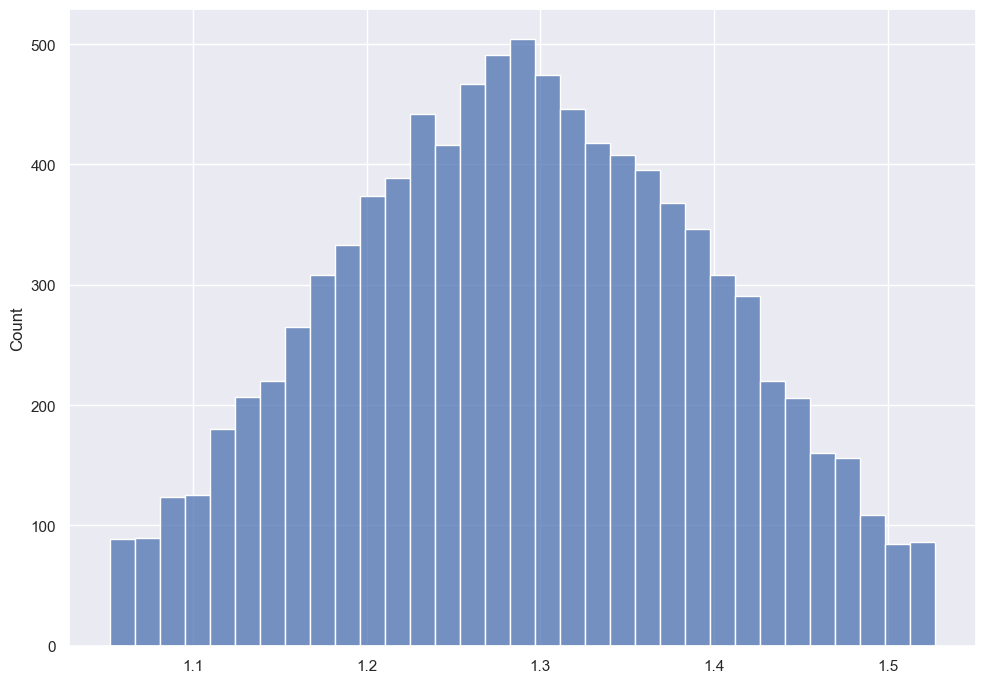

In [59]:
sns.histplot(maes_reduce)

In [60]:
model.coef_

array([ 1.40527065e+01, -2.06518364e+00,  3.84307987e-01, -4.39096593e-01,
        5.01665694e-02,  2.45512549e-01, -1.01854381e-01,  4.29031890e-01,
       -2.22934549e-03,  1.72824110e-01, -2.68099833e-01])

In [61]:
X_train_encoded

,G1,age,Medu,Fedu,failures,studytime,traveltime,Mjob_encoded,Fjob_encoded,schoolsup_encoded,higher_encoded
295,14,17,3,3,0,1,1,12.781907,11.339181,11.835821,11.657627
224,13,16,4,4,0,3,1,11.734708,11.476373,11.835821,11.657627
197,9,16,3,3,0,1,3,11.734708,11.339181,11.835821,11.657627
231,11,17,2,2,0,2,2,10.963057,11.339181,11.835821,11.657627
7,6,17,4,4,0,2,2,10.963057,12.723082,10.094869,11.657627
...,...,...,...,...,...,...,...,...,...,...,...
357,12,17,3,2,0,2,2,12.251790,11.339181,11.835821,11.657627
210,8,19,3,3,0,4,1,10.963057,11.339181,11.835821,11.657627
117,13,16,3,3,0,1,2,10.963057,11.476373,11.835821,11.657627
47,19,16,4,3,0,4,1,12.781907,11.476373,11.835821,11.657627


In [64]:
for x, y in zip(X_train_encoded.columns, model.coef_): # веса линейной регрессии
    print(x, round(y, 2))

G1 14.05
age -2.07
Medu 0.38
Fedu -0.44
failures 0.05
studytime 0.25
traveltime -0.1
Mjob_encoded 0.43
Fjob_encoded -0.0
schoolsup_encoded 0.17
higher_encoded -0.27


In [65]:
X_y_train.groupby("age").agg({'y': 'mean'})

,y
age,
15,12.412698
16,11.963855
17,10.961039
18,11.421875
19,10.000000
20,14.000000
21,7.000000
22,8.000000
